# Exploratory Data Analysis for Capstone Project on Predicting Ocean Water Turbidity

In [50]:
# Import Relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import h2o
from h2o.automl import H2OAutoML
from tabpfn import TabPFNRegressor

## Reading in our data from EDI (Enviromental Data Initiative Portal)

In [2]:
# Package ID: knb-lter-vcr.265.3 Cataloging System:https://pasta.edirepository.org.
# Data set title: Wave and turbidity measurements, Fowling Point, Hog Island Bay, VA, Summer 2016.
# Data set creator:  Patricia Wiberg -
# Metadata Provider:    - Virginia Coast Reserve Long-Term Ecological Research Project
# Contact:  Patricia Wiberg -    - pw3c@virginia.edu
# Contact:    - Information manager - Virginia Coast Reserve Long-Term Ecological Research Project   - jporter@lternet.edu
# Stylesheet v1.3 for metadata conversion into program: John H. Porter, Univ. Virginia, jporter@virginia.edu
#
# This program creates numbered PANDA dataframes named dt1,dt2,dt3...,
# one for each data table in the dataset. It also provides some basic
# summaries of their contents. NumPy and Pandas modules need to be installed
# for the program to run.

import numpy as np
import pandas as pd

infile1  ="https://pasta.lternet.edu/package/data/eml/knb-lter-vcr/265/3/7bd98428fe1dea3312c8e09f49454725".strip()
infile1  = infile1.replace("https://","http://")

dt1 =pd.read_csv(infile1
          ,storage_options={'User-Agent':'EDI_CodeGen'}
          ,skiprows=1
            ,sep=","
                ,quotechar='"'
           , names=[
                    "DATETIME",
                    "WACH_WS",
                    "WACH_WD",
                    "WACH_AT",
                    "WACH_BARO",
                    "DateTimeWL",
                    "WACH_MT",
                    "WACH_PT",
                    "WACH_WT",
                    "FT_YR",
                    "FT_MO",
                    "FT_DY",
                    "FT_HRLST",
                    "FT_MN",
                    "FT_WS",
                    "FT_WD",
                    "Bay_YD_ADP",
                    "Bay_Depth_ADP",
                    "Bay_WT_ADP",
                    "Bay_CSpd_40cm",
                    "Bay_SS_40cm",
                    "Bay_UB_ADP",
                    "Bay_Time_RBR_51114",
                    "Bay_Depth_RBR_51114",
                    "Bay_Hs_RBR_51114",
                    "Bay_Tav_RBR_51114",
                    "Bay_WT_RBR_51114",
                    "Bay_Press_RBR_51114",
                    "Bay_Time_RBR_054076",
                    "Bay_Turb_RBR_054076",
                    "Flat_Time_RBR_051115",
                    "Flat_Depth_051115",
                    "Flat_Hs_051115",
                    "Flat_Tav_051115",
                    "Flat_WT_051115",
                    "Flat_Pres_051115",
                    "Flat_Time_RBR_054077",
                    "Flat_Turb_054077",
                    "OutEdge_Time_021639",
                    "OutEdge_DepCorr_021639",
                    "OutEdge_Hs_021639",
                    "OutEdge_Tav_021639",
                    "OutEdge_WT_021639",
                    "OutEdge_Pres_021639",
                    "InEdge_Time_RBR_021640",
                    "InEdge_Depth_021640",
                    "InEdge_Hs_021640",
                    "InEdge_Tav_021640",
                    "InEdge_WT_021640",
                    "InEdge_Pres_021640",
                    "Int1_Time_RBR_021640",
                    "Int1_Depth_021640",
                    "Int1_Hs_021640",
                    "Int1_Tav_021640",
                    "Int1_WT_021640",
                    "Int1_Pres_021640",
                    "Int2_Time_RBR_015482",
                    "Int2_Depth_015482",
                    "Int2_Hs_015482",
                    "Int2_Tav_015482",
                    "Int2_WT_015482",
                    "Int2_Pres_015482"    ]
# data type checking is commented out because it may cause data
# loads to fail if the data contains inconsistent values. Uncomment
# the following lines to enable data type checking

#            ,dtype={
#             'DATETIME':'str' ,
#             'WACH_WS':'float' ,
#             'WACH_WD':'int' ,
#             'WACH_AT':'float' ,
#             'WACH_BARO':'float' ,
#             'DateTimeWL':'str' ,
#             'WACH_MT':'float' ,
#             'WACH_PT':'float' ,
#             'WACH_WT':'float' ,
#             'FT_YR':'int' ,
#             'FT_MO':'int' ,
#             'FT_DY':'int' ,
#             'FT_HRLST':'int' ,
#             'FT_MN':'int' ,
#             'FT_WS':'float' ,
#             'FT_WD':'float' ,
#             'Bay_YD_ADP':'float' ,
#             'Bay_Depth_ADP':'float' ,
#             'Bay_WT_ADP':'float' ,
#             'Bay_CSpd_40cm':'float' ,
#             'Bay_SS_40cm':'float' ,
#             'Bay_UB_ADP':'float' ,
#             'Bay_Time_RBR_51114':'str' ,
#             'Bay_Depth_RBR_51114':'float' ,
#             'Bay_Hs_RBR_51114':'float' ,
#             'Bay_Tav_RBR_51114':'float' ,
#             'Bay_WT_RBR_51114':'float' ,
#             'Bay_Press_RBR_51114':'float' ,
#             'Bay_Time_RBR_054076':'str' ,
#             'Bay_Turb_RBR_054076':'float' ,
#             'Flat_Time_RBR_051115':'str' ,
#             'Flat_Depth_051115':'float' ,
#             'Flat_Hs_051115':'float' ,
#             'Flat_Tav_051115':'float' ,
#             'Flat_WT_051115':'float' ,
#             'Flat_Pres_051115':'float' ,
#             'Flat_Time_RBR_054077':'str' ,
#             'Flat_Turb_054077':'float' ,
#             'OutEdge_Time_021639':'str' ,
#             'OutEdge_DepCorr_021639':'float' ,
#             'OutEdge_Hs_021639':'float' ,
#             'OutEdge_Tav_021639':'float' ,
#             'OutEdge_WT_021639':'float' ,
#             'OutEdge_Pres_021639':'float' ,
#             'InEdge_Time_RBR_021640':'str' ,
#             'InEdge_Depth_021640':'float' ,
#             'InEdge_Hs_021640':'float' ,
#             'InEdge_Tav_021640':'float' ,
#             'InEdge_WT_021640':'float' ,
#             'InEdge_Pres_021640':'float' ,
#             'Int1_Time_RBR_021640':'str' ,
#             'Int1_Depth_021640':'float' ,
#             'Int1_Hs_021640':'float' ,
#             'Int1_Tav_021640':'float' ,
#             'Int1_WT_021640':'float' ,
#             'Int1_Pres_021640':'float' ,
#             'Int2_Time_RBR_015482':'str' ,
#             'Int2_Depth_015482':'float' ,
#             'Int2_Hs_015482':'float' ,
#             'Int2_Tav_015482':'float' ,
#             'Int2_WT_015482':'float' ,
#             'Int2_Pres_015482':'float'
#        }
          ,parse_dates=[
                        'DATETIME',
                        'DateTimeWL',
                        'Bay_Time_RBR_51114',
                        'Bay_Time_RBR_054076',
                        'Flat_Time_RBR_051115',
                        'Flat_Time_RBR_054077',
                        'OutEdge_Time_021639',
                        'InEdge_Time_RBR_021640',
                        'Int1_Time_RBR_021640',
                        'Int2_Time_RBR_015482',
                ]
    )
# Coerce the data into the types specified in the metadata
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(DATETIME_datetime=pd.to_datetime(dt1.DATETIME,errors='coerce'))
dt1.WACH_WS=pd.to_numeric(dt1.WACH_WS,errors='coerce')
dt1.WACH_WD=pd.to_numeric(dt1.WACH_WD,errors='coerce',downcast='integer')
dt1.WACH_AT=pd.to_numeric(dt1.WACH_AT,errors='coerce')
dt1.WACH_BARO=pd.to_numeric(dt1.WACH_BARO,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(DateTimeWL_datetime=pd.to_datetime(dt1.DateTimeWL,errors='coerce'))
dt1.WACH_MT=pd.to_numeric(dt1.WACH_MT,errors='coerce')
dt1.WACH_PT=pd.to_numeric(dt1.WACH_PT,errors='coerce')
dt1.WACH_WT=pd.to_numeric(dt1.WACH_WT,errors='coerce')
dt1.FT_YR=pd.to_numeric(dt1.FT_YR,errors='coerce',downcast='integer')
dt1.FT_MO=pd.to_numeric(dt1.FT_MO,errors='coerce',downcast='integer')
dt1.FT_DY=pd.to_numeric(dt1.FT_DY,errors='coerce',downcast='integer')
dt1.FT_HRLST=pd.to_numeric(dt1.FT_HRLST,errors='coerce',downcast='integer')
dt1.FT_MN=pd.to_numeric(dt1.FT_MN,errors='coerce',downcast='integer')
dt1.FT_WS=pd.to_numeric(dt1.FT_WS,errors='coerce')
dt1.FT_WD=pd.to_numeric(dt1.FT_WD,errors='coerce')
dt1.Bay_YD_ADP=pd.to_numeric(dt1.Bay_YD_ADP,errors='coerce')
dt1.Bay_Depth_ADP=pd.to_numeric(dt1.Bay_Depth_ADP,errors='coerce')
dt1.Bay_WT_ADP=pd.to_numeric(dt1.Bay_WT_ADP,errors='coerce')
dt1.Bay_CSpd_40cm=pd.to_numeric(dt1.Bay_CSpd_40cm,errors='coerce')
dt1.Bay_SS_40cm=pd.to_numeric(dt1.Bay_SS_40cm,errors='coerce')
dt1.Bay_UB_ADP=pd.to_numeric(dt1.Bay_UB_ADP,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Bay_Time_RBR_51114_datetime=pd.to_datetime(dt1.Bay_Time_RBR_51114,errors='coerce'))
dt1.Bay_Depth_RBR_51114=pd.to_numeric(dt1.Bay_Depth_RBR_51114,errors='coerce')
dt1.Bay_Hs_RBR_51114=pd.to_numeric(dt1.Bay_Hs_RBR_51114,errors='coerce')
dt1.Bay_Tav_RBR_51114=pd.to_numeric(dt1.Bay_Tav_RBR_51114,errors='coerce')
dt1.Bay_WT_RBR_51114=pd.to_numeric(dt1.Bay_WT_RBR_51114,errors='coerce')
dt1.Bay_Press_RBR_51114=pd.to_numeric(dt1.Bay_Press_RBR_51114,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Bay_Time_RBR_054076_datetime=pd.to_datetime(dt1.Bay_Time_RBR_054076,errors='coerce'))
dt1.Bay_Turb_RBR_054076=pd.to_numeric(dt1.Bay_Turb_RBR_054076,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Flat_Time_RBR_051115_datetime=pd.to_datetime(dt1.Flat_Time_RBR_051115,errors='coerce'))
dt1.Flat_Depth_051115=pd.to_numeric(dt1.Flat_Depth_051115,errors='coerce')
dt1.Flat_Hs_051115=pd.to_numeric(dt1.Flat_Hs_051115,errors='coerce')
dt1.Flat_Tav_051115=pd.to_numeric(dt1.Flat_Tav_051115,errors='coerce')
dt1.Flat_WT_051115=pd.to_numeric(dt1.Flat_WT_051115,errors='coerce')
dt1.Flat_Pres_051115=pd.to_numeric(dt1.Flat_Pres_051115,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Flat_Time_RBR_054077_datetime=pd.to_datetime(dt1.Flat_Time_RBR_054077,errors='coerce'))
dt1.Flat_Turb_054077=pd.to_numeric(dt1.Flat_Turb_054077,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(OutEdge_Time_021639_datetime=pd.to_datetime(dt1.OutEdge_Time_021639,errors='coerce'))
dt1.OutEdge_DepCorr_021639=pd.to_numeric(dt1.OutEdge_DepCorr_021639,errors='coerce')
dt1.OutEdge_Hs_021639=pd.to_numeric(dt1.OutEdge_Hs_021639,errors='coerce')
dt1.OutEdge_Tav_021639=pd.to_numeric(dt1.OutEdge_Tav_021639,errors='coerce')
dt1.OutEdge_WT_021639=pd.to_numeric(dt1.OutEdge_WT_021639,errors='coerce')
dt1.OutEdge_Pres_021639=pd.to_numeric(dt1.OutEdge_Pres_021639,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(InEdge_Time_RBR_021640_datetime=pd.to_datetime(dt1.InEdge_Time_RBR_021640,errors='coerce'))
dt1.InEdge_Depth_021640=pd.to_numeric(dt1.InEdge_Depth_021640,errors='coerce')
dt1.InEdge_Hs_021640=pd.to_numeric(dt1.InEdge_Hs_021640,errors='coerce')
dt1.InEdge_Tav_021640=pd.to_numeric(dt1.InEdge_Tav_021640,errors='coerce')
dt1.InEdge_WT_021640=pd.to_numeric(dt1.InEdge_WT_021640,errors='coerce')
dt1.InEdge_Pres_021640=pd.to_numeric(dt1.InEdge_Pres_021640,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Int1_Time_RBR_021640_datetime=pd.to_datetime(dt1.Int1_Time_RBR_021640,errors='coerce'))
dt1.Int1_Depth_021640=pd.to_numeric(dt1.Int1_Depth_021640,errors='coerce')
dt1.Int1_Hs_021640=pd.to_numeric(dt1.Int1_Hs_021640,errors='coerce')
dt1.Int1_Tav_021640=pd.to_numeric(dt1.Int1_Tav_021640,errors='coerce')
dt1.Int1_WT_021640=pd.to_numeric(dt1.Int1_WT_021640,errors='coerce')
dt1.Int1_Pres_021640=pd.to_numeric(dt1.Int1_Pres_021640,errors='coerce')
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below.
dt1=dt1.assign(Int2_Time_RBR_015482_datetime=pd.to_datetime(dt1.Int2_Time_RBR_015482,errors='coerce'))
dt1.Int2_Depth_015482=pd.to_numeric(dt1.Int2_Depth_015482,errors='coerce')
dt1.Int2_Hs_015482=pd.to_numeric(dt1.Int2_Hs_015482,errors='coerce')
dt1.Int2_Tav_015482=pd.to_numeric(dt1.Int2_Tav_015482,errors='coerce')
dt1.Int2_WT_015482=pd.to_numeric(dt1.Int2_WT_015482,errors='coerce')
dt1.Int2_Pres_015482=pd.to_numeric(dt1.Int2_Pres_015482,errors='coerce')

print("Here is a description of the data frame dt1 and number of lines\n")
print(dt1.info())
print("--------------------\n\n")
print("Here is a summary of numerical variables in the data frame dt1\n")
print(dt1.describe())
print("--------------------\n\n")

<ipython-input-2-40809e1e69fd>:20: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt1 =pd.read_csv(infile1
<ipython-input-2-40809e1e69fd>:20: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt1 =pd.read_csv(infile1
<ipython-input-2-40809e1e69fd>:20: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt1 =pd.read_csv(infile1
<ipython-input-2-40809e1e69fd>:20: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S.%f format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dt1 =pd.read_csv(infile1
<ipython-input-2-40809e1e69fd>:222: UserWarning: Parsing dat

Here is a description of the data frame dt1 and number of lines

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 72 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   DATETIME                         1000 non-null   datetime64[ns]
 1   WACH_WS                          1000 non-null   float64       
 2   WACH_WD                          1000 non-null   int16         
 3   WACH_AT                          1000 non-null   float64       
 4   WACH_BARO                        1000 non-null   float64       
 5   DateTimeWL                       1000 non-null   datetime64[ns]
 6   WACH_MT                          1000 non-null   float64       
 7   WACH_PT                          1000 non-null   float64       
 8   WACH_WT                          1000 non-null   float64       
 9   FT_YR                            1000 non-null   int16         
 

In [3]:
# Taking a look at our columns
dt1.columns

Index(['DATETIME', 'WACH_WS', 'WACH_WD', 'WACH_AT', 'WACH_BARO', 'DateTimeWL',
       'WACH_MT', 'WACH_PT', 'WACH_WT', 'FT_YR', 'FT_MO', 'FT_DY', 'FT_HRLST',
       'FT_MN', 'FT_WS', 'FT_WD', 'Bay_YD_ADP', 'Bay_Depth_ADP', 'Bay_WT_ADP',
       'Bay_CSpd_40cm', 'Bay_SS_40cm', 'Bay_UB_ADP', 'Bay_Time_RBR_51114',
       'Bay_Depth_RBR_51114', 'Bay_Hs_RBR_51114', 'Bay_Tav_RBR_51114',
       'Bay_WT_RBR_51114', 'Bay_Press_RBR_51114', 'Bay_Time_RBR_054076',
       'Bay_Turb_RBR_054076', 'Flat_Time_RBR_051115', 'Flat_Depth_051115',
       'Flat_Hs_051115', 'Flat_Tav_051115', 'Flat_WT_051115',
       'Flat_Pres_051115', 'Flat_Time_RBR_054077', 'Flat_Turb_054077',
       'OutEdge_Time_021639', 'OutEdge_DepCorr_021639', 'OutEdge_Hs_021639',
       'OutEdge_Tav_021639', 'OutEdge_WT_021639', 'OutEdge_Pres_021639',
       'InEdge_Time_RBR_021640', 'InEdge_Depth_021640', 'InEdge_Hs_021640',
       'InEdge_Tav_021640', 'InEdge_WT_021640', 'InEdge_Pres_021640',
       'Int1_Time_RBR_021640', 'Int1_Dep

# Descriptions of Variables


* 'DATETIME': Date and Time  
* 'WACH_WS': Wachaperague Wind Speed (meterPerSecond)
* 'WACH_WD': Wachaperague Wind Direction (degree)  
* 'WACH_AT': Wachaperague Air Temperature (degreeCelsius)
* 'WACH_BARO': Wachaperague Barometric Pressure (millibar)
* 'DateTimeWL': Date and Time
* 'WACH_MT': Wachaperague Measured Tide (interval measured in meters)
* 'WACH_PT': Wachaperague Predicted Tide (interval measured in meters)
* 'WACH_WT': Wachaperague Water Temperature (degreeCelsius)
* 'FT_YR': Flux Tower Year
* 'FT_MO': Flux Tower Month
* 'FT_DY': Flux Tower Day
* 'FT_HRLST': Flux Tower Hour
* 'FT_MN': Flux Tower Minute
* 'FT_WS': Flux Tower Wind Speed (meterPerSecond)
* 'FT_WD': Flux Tower Wind Direction (degree)
* 'Bay_YD_ADP': Bay (ADP) Year Day (day)
* 'Bay_Depth_ADP': Bay (ADP) Depth (meter)
* 'Bay_WT_ADP': Bay (ADP) Water Temperature (degreeCelsius)
* 'Bay_CSpd_40cm': Bay  ADP) Current Speed (meterPerSecond)
* 'Bay_SS_40cm': Bay (ADP) Signal Strength (none)
* 'Bay_UB_ADP': Bay (ADP) Water Bottom Orbital Velocity (meterPerSecond)
* 'Bay_Time_RBR_51114': Bay (RBR) Date and Time
* 'Bay_Depth_RBR_51114': Bay (RBR) Depth (meter)
* 'Bay_Hs_RBR_51114': Bay (RBR) Significant Wave Height (meter)
* 'Bay_Tav_RBR_51114': Bay (RBR) Average Wave Period (second)
* 'Bay_WT_RBR_51114': Bay (RBR) Water Temperature (degreeCelsius)
* 'Bay_Press_RBR_51114': Bay (RBR) Pressure (decibar)
* 'Bay_Time_RBR_054076': Bay (RBR) Date and Time
### **'Bay_Turb_RBR_054076': Bay Turbidity (NTU) ((Target Variable))**
* 'Flat_Time_RBR_051115': Date Time
* 'Flat_Depth_051115': Flat Depth (meter)
* 'Flat_Hs_051115': Flat Significant Wave Height (meter)
* 'Flat_Tav_051115': Flat Average Wave Period (second)
* 'Flat_WT_051115': Flat Water Temperature (degreeCelsius)
* 'Flat_Pres_051115': Flat Pressure (decibar)
* 'Flat_Time_RBR_054077': Date and Time
### **'Flat_Turb_054077': Flat Turbidity (NTU) ((Target Variable))**
* 'OutEdge_Time_021639': Date and Time
* 'OutEdge_DepCorr_021639': Outer Edge Depth (meter)
* 'OutEdge_Hs_021639': Outer Edge Significant Wave Height (meter)
* 'OutEdge_Tav_021639': Outer Edge Average Wave Period (second)
* 'OutEdge_WT_021639': Outer Edge Water Temperature (degreeCelsius)
* 'OutEdge_Pres_021639': Outer Edge Pressure (decibar)
* 'InEdge_Time_RBR_021640': Date and Time
* 'InEdge_Depth_021640': Inner Edge Depth (meter)
* 'InEdge_Hs_021640': Inner Edge Significant Wave Height (meter)
* 'InEdge_Tav_021640': Inner Edge Average Wave Period (second)
* 'InEdge_WT_021640': Inner Edge Water Temperature (degreeCelsius)
* 'InEdge_Pres_021640': Inner Edge Pressure (decibar)
* 'Int1_Time_RBR_021640': Date and Time
* 'Int1_Depth_021640': Marsh Interior 1 Depth (meter)
* 'Int1_Hs_021640': Marsh Interior 1 Significant Wave Height (meter)
* 'Int1_Tav_021640': Marsh Interior 1 Average Wave Period (second)
* 'Int1_WT_021640': Marsh Interior 1 Water Temperature (degreeC)
* 'Int1_Pres_021640': Marsh Interior 1 Pressure (decibar)
* 'Int2_Time_RBR_015482': Marsh Interior 2 Date and Time
* 'Int2_Depth_015482': Marsh Interior 2 Depth (meter)
* 'Int2_Hs_015482': Marsh Interior 2 Significant Wave Height (meter)
* 'Int2_Tav_015482': Marsh Interior 2 Average Wave Period (second)
* 'Int2_WT_015482': Marsh Interior 2 Water Temperature (degreeC)
* 'Int2_Pres_015482': Marsh Interior 2 Pressure (decibar)




#Description of Data

This data is compiled from a study titled

> *Wave and turbidity measurements, Fowling Point, Hog Island Bay, VA, Summer 2016*

The abstract from the study states the following:


> "The measurements were made to support marsh depositional modeling being carried out as part of an NSF-sponsored Coastal SEES research project."

The study took measurement from the following 9 locations.

1.   Wachaperague
2.   Flux Tower
3.   Bay (ADP)
4.   Bay (RBR)
5.   Flat
6.   Outer Edge
7.   Inner Edge
8.   Marsh Interior 1
9.   Marsh Interior 2

These locations all took similar measurements of things such as averge wave period, significant wave height, water temperature, ect.

Only two of the locations recored turbidty data which is our target variable, thus, for this project, we will only be using data from locations 4 and 5 (Bay RBR and Flat)







#Data Cleaning



*   Getting Rid of Erronious Variables
*   Addressing missing values



In [4]:
# Creating a of variables to remove
dt1.columns

Index(['DATETIME', 'WACH_WS', 'WACH_WD', 'WACH_AT', 'WACH_BARO', 'DateTimeWL',
       'WACH_MT', 'WACH_PT', 'WACH_WT', 'FT_YR', 'FT_MO', 'FT_DY', 'FT_HRLST',
       'FT_MN', 'FT_WS', 'FT_WD', 'Bay_YD_ADP', 'Bay_Depth_ADP', 'Bay_WT_ADP',
       'Bay_CSpd_40cm', 'Bay_SS_40cm', 'Bay_UB_ADP', 'Bay_Time_RBR_51114',
       'Bay_Depth_RBR_51114', 'Bay_Hs_RBR_51114', 'Bay_Tav_RBR_51114',
       'Bay_WT_RBR_51114', 'Bay_Press_RBR_51114', 'Bay_Time_RBR_054076',
       'Bay_Turb_RBR_054076', 'Flat_Time_RBR_051115', 'Flat_Depth_051115',
       'Flat_Hs_051115', 'Flat_Tav_051115', 'Flat_WT_051115',
       'Flat_Pres_051115', 'Flat_Time_RBR_054077', 'Flat_Turb_054077',
       'OutEdge_Time_021639', 'OutEdge_DepCorr_021639', 'OutEdge_Hs_021639',
       'OutEdge_Tav_021639', 'OutEdge_WT_021639', 'OutEdge_Pres_021639',
       'InEdge_Time_RBR_021640', 'InEdge_Depth_021640', 'InEdge_Hs_021640',
       'InEdge_Tav_021640', 'InEdge_WT_021640', 'InEdge_Pres_021640',
       'Int1_Time_RBR_021640', 'Int1_Dep

In [5]:
# Columns for removal
cols_to_remove = ['DATETIME', 'WACH_WS', 'WACH_WD', 'WACH_AT', 'WACH_BARO', 'DateTimeWL',
       'WACH_MT', 'WACH_PT', 'WACH_WT', 'FT_YR', 'FT_MO', 'FT_DY', 'FT_HRLST',
       'FT_MN', 'FT_WS', 'FT_WD', 'Bay_YD_ADP', 'Bay_Depth_ADP', 'Bay_WT_ADP',
       'Bay_CSpd_40cm', 'Bay_SS_40cm', 'Bay_UB_ADP','OutEdge_Time_021639', 'OutEdge_DepCorr_021639', 'OutEdge_Hs_021639',
       'OutEdge_Tav_021639', 'OutEdge_WT_021639', 'OutEdge_Pres_021639',
       'InEdge_Time_RBR_021640', 'InEdge_Depth_021640', 'InEdge_Hs_021640',
       'InEdge_Tav_021640', 'InEdge_WT_021640', 'InEdge_Pres_021640',
       'Int1_Time_RBR_021640', 'Int1_Depth_021640', 'Int1_Hs_021640',
       'Int1_Tav_021640', 'Int1_WT_021640', 'Int1_Pres_021640',
       'Int2_Time_RBR_015482', 'Int2_Depth_015482', 'Int2_Hs_015482',
       'Int2_Tav_015482', 'Int2_WT_015482', 'Int2_Pres_015482',
       'DATETIME_datetime', 'DateTimeWL_datetime',
       'Bay_Time_RBR_51114_datetime', 'Bay_Time_RBR_054076_datetime',
       'Flat_Time_RBR_051115_datetime', 'Flat_Time_RBR_054077_datetime',
       'OutEdge_Time_021639_datetime', 'InEdge_Time_RBR_021640_datetime',
       'Int1_Time_RBR_021640_datetime', 'Int2_Time_RBR_015482_datetime']

In [6]:
# Removing Columns
dt1 = dt1.drop(columns=cols_to_remove)

In [7]:
# Checking new column list
dt1.columns

Index(['Bay_Time_RBR_51114', 'Bay_Depth_RBR_51114', 'Bay_Hs_RBR_51114',
       'Bay_Tav_RBR_51114', 'Bay_WT_RBR_51114', 'Bay_Press_RBR_51114',
       'Bay_Time_RBR_054076', 'Bay_Turb_RBR_054076', 'Flat_Time_RBR_051115',
       'Flat_Depth_051115', 'Flat_Hs_051115', 'Flat_Tav_051115',
       'Flat_WT_051115', 'Flat_Pres_051115', 'Flat_Time_RBR_054077',
       'Flat_Turb_054077'],
      dtype='object')

In [8]:
# Checking dataframe shape
dt1.shape

(1000, 16)

In [9]:
# Looking for Missing or null values
dt1.isna().sum()

,0
Bay_Time_RBR_51114,0
Bay_Depth_RBR_51114,0
Bay_Hs_RBR_51114,0
Bay_Tav_RBR_51114,0
Bay_WT_RBR_51114,0
Bay_Press_RBR_51114,0
Bay_Time_RBR_054076,0
Bay_Turb_RBR_054076,0
Flat_Time_RBR_051115,0
Flat_Depth_051115,0


In [10]:
# Checking Data types of our remaining variables
dt1.dtypes

,0
Bay_Time_RBR_51114,datetime64[ns]
Bay_Depth_RBR_51114,float64
Bay_Hs_RBR_51114,float64
Bay_Tav_RBR_51114,float64
Bay_WT_RBR_51114,float64
Bay_Press_RBR_51114,float64
Bay_Time_RBR_054076,datetime64[ns]
Bay_Turb_RBR_054076,float64
Flat_Time_RBR_051115,datetime64[ns]
Flat_Depth_051115,float64


#Data Understanding


*   Making Plots
*   Checking correlations
*   Basic Statistics for each variable



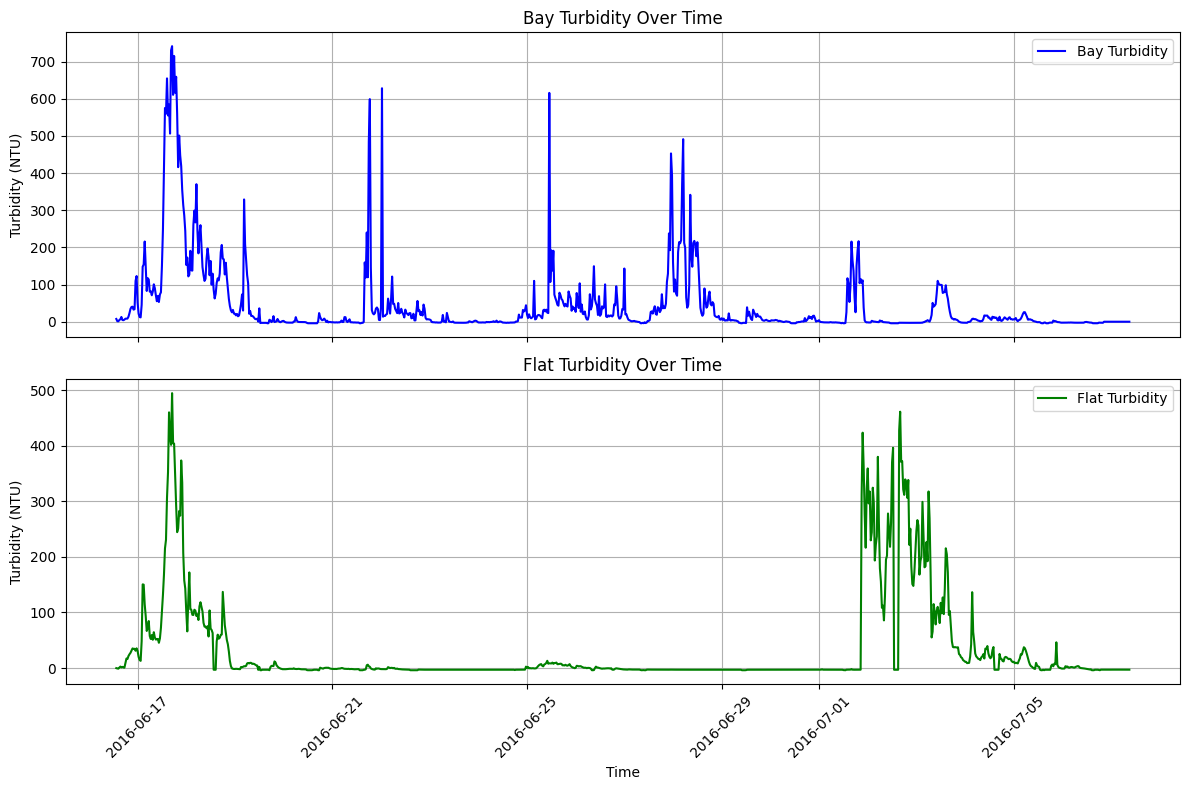

In [11]:
# Create the subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# First subplot - Bay Turbidity
axes[0].plot(dt1['Bay_Time_RBR_51114'], dt1['Bay_Turb_RBR_054076'], label='Bay Turbidity', color='blue')
axes[0].set_ylabel('Turbidity (NTU)')
axes[0].set_title('Bay Turbidity Over Time')
axes[0].legend()
axes[0].grid(True)

# Second subplot - Flat Turbidity
axes[1].plot(dt1['Flat_Time_RBR_051115'], dt1['Flat_Turb_054077'], label='Flat Turbidity', color='green')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Turbidity (NTU)')
axes[1].set_title('Flat Turbidity Over Time')
axes[1].legend()
axes[1].grid(True)

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Looking at Significant Wave Height and Turbidty over time in Bay and Flat locations

# Create 4 vertically stacked subplots sharing the same x-axis
fig = make_subplots(rows=4, cols=1, shared_xaxes=True,
                    subplot_titles=("Bay Turbidity", "Bay Significant Wave Height",
                                    "Flat Turbidity", "Flat Significant Wave Height"))

# Bay Turbidity
fig.add_trace(go.Scatter(x=dt1['Bay_Time_RBR_51114'],
                         y=dt1['Bay_Turb_RBR_054076'],
                         name='Bay Turbidity',
                         line=dict(color='blue')),
              row=1, col=1)

# Bay Significant Wave Height
fig.add_trace(go.Scatter(x=dt1['Bay_Time_RBR_51114'],
                         y=dt1['Bay_Hs_RBR_51114'],
                         name='Bay Wave Height',
                         line=dict(color='green')),
              row=2, col=1)

# Flat Turbidity
fig.add_trace(go.Scatter(x=dt1['Flat_Time_RBR_051115'],
                         y=dt1['Flat_Turb_054077'],
                         name='Flat Turbidity',
                         line=dict(color='purple')),
              row=3, col=1)

# Flat Significant Wave Height
fig.add_trace(go.Scatter(x=dt1['Flat_Time_RBR_051115'],
                         y=dt1['Flat_Hs_051115'],
                         name='Flat Wave Height',
                         line=dict(color='orange')),
              row=4, col=1)

# Update layout
fig.update_layout(height=1000, width=1200,
                  title_text="Turbidity and Wave Height Over Time (Bay and Flat)",
                  showlegend=False)

# Customize axes
fig.update_xaxes(title_text="Time", row=4, col=1)
fig.update_yaxes(title_text="Turbidity (NTU)", row=1, col=1)
fig.update_yaxes(title_text="Wave Height (m)", row=2, col=1)
fig.update_yaxes(title_text="Turbidity (NTU)", row=3, col=1)
fig.update_yaxes(title_text="Wave Height (m)", row=4, col=1)

# Show figure
fig.show()

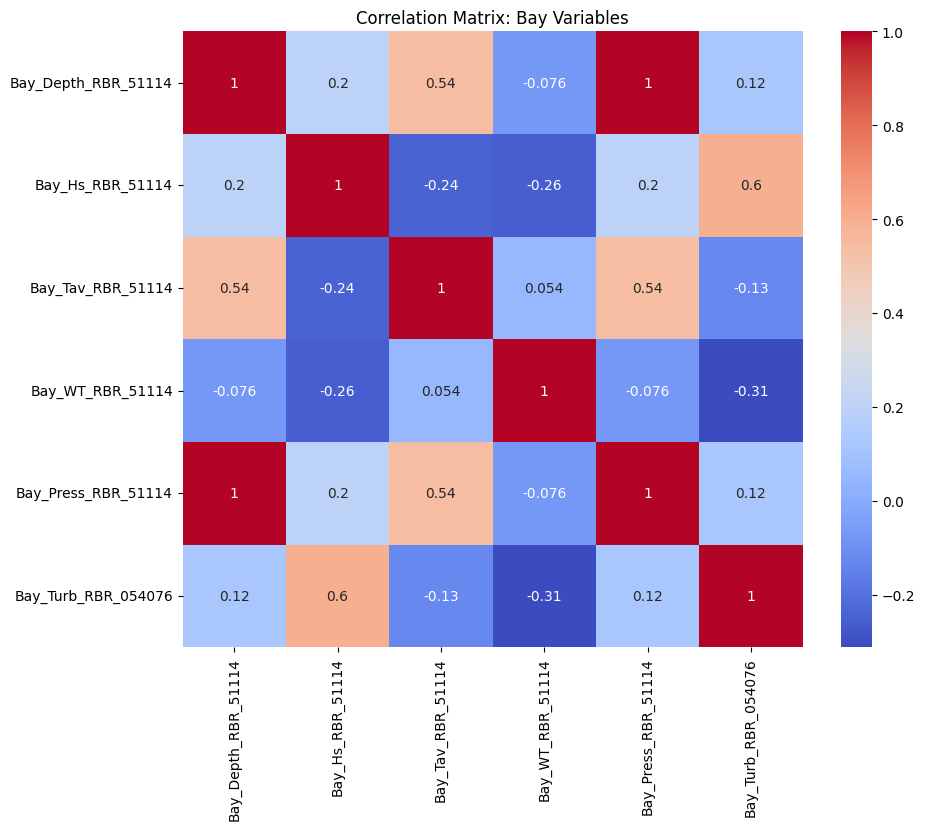

In [13]:
corr = dt1[['Bay_Depth_RBR_51114', 'Bay_Hs_RBR_51114', 'Bay_Tav_RBR_51114',
            'Bay_WT_RBR_51114', 'Bay_Press_RBR_51114', 'Bay_Turb_RBR_054076']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Bay Variables')
plt.show()

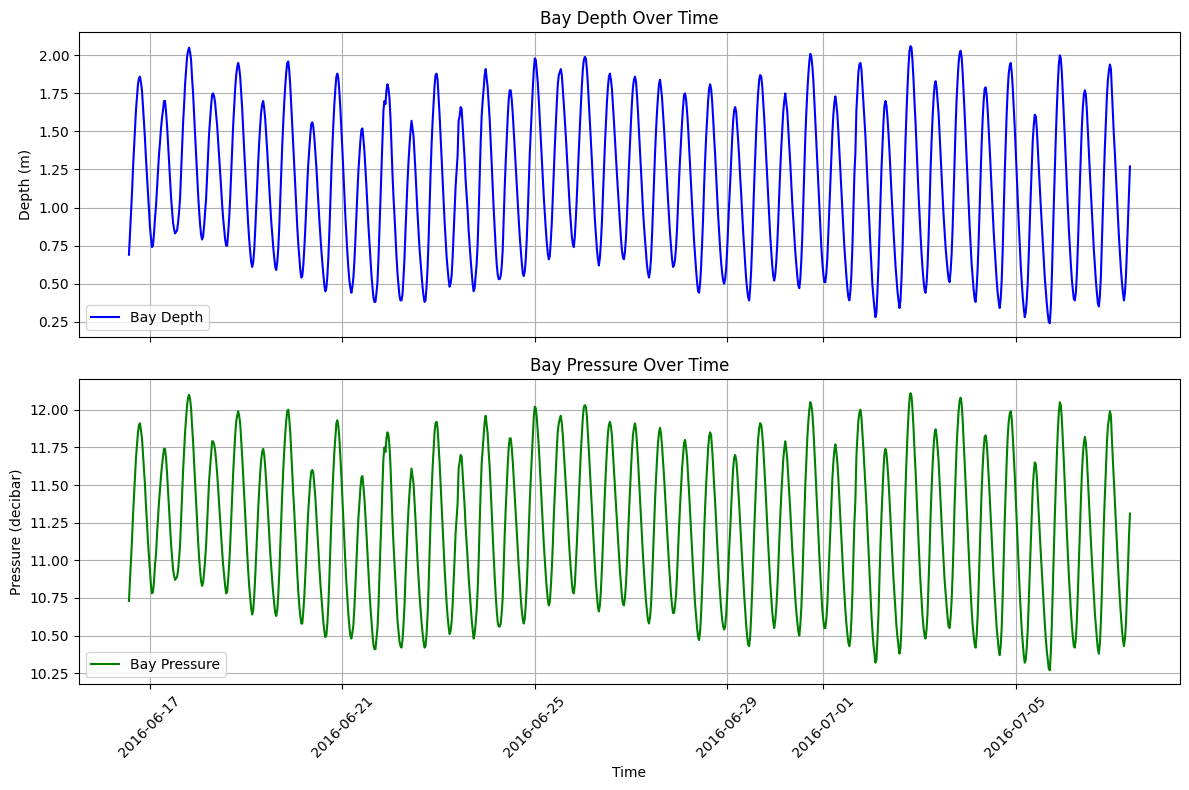

In [52]:
# Graphing bay depth and pressure to observe perfect correlation

# Create the subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# First subplot - Bay Depth
axes[0].plot(dt1['Bay_Time_RBR_51114'], dt1['Bay_Depth_RBR_51114'], label='Bay Depth', color='blue')
axes[0].set_ylabel('Depth (m)')
axes[0].set_title('Bay Depth Over Time')
axes[0].legend()
axes[0].grid(True)

# Second subplot - Bay Pressure
axes[1].plot(dt1['Bay_Time_RBR_51114'], dt1['Bay_Press_RBR_51114'], label='Bay Pressure', color='green')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Pressure (decibar)')
axes[1].set_title('Bay Pressure Over Time')
axes[1].legend()
axes[1].grid(True)

# Improve layout
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
# I will drop our pressure variable due to the perfect 1 to 1 correlation

In [55]:
'''Before going any further I am going to combine the data from both locations.
I will do this by first creating two separate dataframes, each with their own new column denoting their location.
Then I will concatenate them to have all observations in a larger dataset.'''

# Bay Dataset
bay_df = dt1[['Bay_Time_RBR_51114', 'Bay_Depth_RBR_51114', 'Bay_Hs_RBR_51114',
              'Bay_Tav_RBR_51114', 'Bay_WT_RBR_51114', 'Bay_Turb_RBR_054076']].copy()
bay_df.columns = ['Time', 'Depth', 'Hs', 'Tav', 'WT', 'Turbidity']
bay_df['Location'] = 'Bay'

# Flat Dataset
flat_df = dt1[['Flat_Time_RBR_051115', 'Flat_Depth_051115', 'Flat_Hs_051115',
               'Flat_Tav_051115', 'Flat_WT_051115', 'Flat_Turb_054077']].copy()
flat_df.columns = ['Time', 'Depth', 'Hs', 'Tav', 'WT', 'Turbidity']
flat_df['Location'] = 'Flat'

# Combine
combined_df = pd.concat([bay_df, flat_df], ignore_index=True)

In [56]:
bay_df['Wave_Energy'] = (bay_df['Hs']**2) * (bay_df['Tav'])

In [57]:
# Creating some interaction terms such as wave energy (Significant Wave Height)^2 * (Average Wave Period)

combined_df['Wave_Energy'] = (combined_df['Hs']**2) * (combined_df['Tav'])

In [58]:
combined_df['Location'] = combined_df['Location'].astype('string')

#Feature Engineering for Baseline (Dummy) Model

In [59]:
# Creating a preprocessing pipeline to one-hot-encode, standardize, and scale our data.

#1. Removing the Time aspect for model training
cleaned_df = combined_df.drop(columns=['Time'])

In [60]:
# One-hot-Encoding, standardizing, and Scaling for dummy model

# 1. Define feature groups
numeric_features = ['Depth', 'Hs', 'Tav', 'WT', 'Wave_Energy']
categorical_features = ['Location']

# 2. Create Preprocessor

# Numerical: Standard Scaler
num_transformer = StandardScaler()

# Categorical: One-Hot Encoder
cat_transformer = OneHotEncoder(drop='first')

# Create column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numeric_features),
        ('cat', cat_transformer, categorical_features)
    ])

In [61]:
# Build Full Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', DummyRegressor(strategy='mean')) # will predict the mean value
])

In [63]:
# Separating our data
X = cleaned_df.drop(columns=['Turbidity'])
y = cleaned_df['Turbidity']

X_train, X_test, y_train, y_test, time_train, time_test = train_test_split(X, y, time, test_size=0.2, random_state=42)

In [70]:
# Fitting our Pipeline
pipeline.fit(X_train, y_train)

# Predict Values and Evaluate Performance (Train and Test MSE)
y_pred = pipeline.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
train_mse = mean_squared_error(y_train, pipeline.predict(X_train))

# Print Performance Evaluation
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train RMSE: {np.sqrt(train_mse)}")
print(f"Test RMSE: {np.sqrt(test_mse)}")

Train MSE: 8462.781351348302
Test MSE: 9311.230703699226
Train RMSE: 91.99337667108595
Test RMSE: 96.49471852748847


In [76]:
# Looking at turbidity range to find error percentage
print("Turbidity Range:", y.min(), "to", y.max())
print("Turbidity Mean:", y.mean())
print("Turbidity Std Dev:", y.std())
print()
print(f"Percentage Error (RMSE/Turbidity Range):  {(np.sqrt(test_mse)/(y.max()-y.min())*100).round(2)}%")

Turbidity Range: -4.125878621 to 741.4313045
Turbidity Mean: 37.694952785255
Turbidity Std Dev: 92.93067733276044

Percentage Error (RMSE/Turbidity Range):  12.94%


#Evaluation of Preliminary Results

Our first dummy model has the following respective performance metrics

> Train MSE: **8462.78** | Test MSE: **9311.23**

This seems unreasonablly large. Looking back at our visualizations from before, I noticed that for a large section of Turbidity measures from the Flat location, the Turbidty values stay at 0 while there is a lot of variability in our Significant Wave Height. This is in consistent with the visualizations from the Bay location. There we see a strong positive correlation between Turbidity and Significant Wave Height.

I suspect that the instrumentation for measuring Turbidity in the Flat location might have malfunctioned over the period of time ranging from approximately **June 16, 2016 - July 1, 2016**.

My next step will be to test this hypothesis. I will retrain another dummy model and evaluate it, only this time it will only be trained on the bay data.


In [77]:
# Prepairing bay_df

bay_df = bay_df.drop(columns=['Time'])

In [78]:
bay_df

,Depth,Hs,Tav,WT,Turbidity,Location,Wave_Energy
0,0.69,0.01,1.18,26.04,7.435777,Bay,0.000118
1,0.82,0.01,1.36,25.98,1.442779,Bay,0.000136
2,0.96,0.02,1.63,26.05,1.192560,Bay,0.000652
3,1.09,0.00,2.36,26.17,4.496351,Bay,0.000000
4,1.25,0.01,2.10,26.22,6.777663,Bay,0.000210
...,...,...,...,...,...,...,...
995,0.55,0.00,1.11,28.29,0.000000,Bay,0.000000
996,0.72,0.00,1.35,28.43,0.000000,Bay,0.000000
997,0.91,0.00,1.59,28.65,0.000000,Bay,0.000000
998,1.11,0.00,2.57,28.78,0.000000,Bay,0.000000


In [79]:
# Separating Data
X_bay = bay_df.drop(columns=['Turbidity'])
y_bay = bay_df['Turbidity']

# Train-test split
X_train_bay, X_test_bay, y_train_bay, y_test_bay = train_test_split(X_bay, y_bay, test_size=0.2, random_state=42)

In [80]:
# Fitting same dummy pipeline
pipeline.fit(X_train_bay, y_train_bay)

# Predict Values and Evaluate Performance (Train and Test MSE)
y_pred_bay = pipeline.predict(X_test_bay)
test_mse_bay = mean_squared_error(y_test_bay, y_pred_bay)
train_mse_bay = mean_squared_error(y_train_bay, pipeline.predict(X_train_bay))

# Print performance metrics (MSE)
print(f"Train MSE: {train_mse_bay}")
print(f"Test MSE: {test_mse_bay}")

Train MSE: 9476.69027924541
Test MSE: 13780.336353464825


In [81]:
# Linear Regression Pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [82]:
# Training Model (combined_df)
pipeline_lr.fit(X_train, y_train)

# Predict
y_train_pred = pipeline_lr.predict(X_train)
y_test_pred = pipeline_lr.predict(X_test)

In [87]:
# Evaluate Model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print Results
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")
print(f"Bay Train RMSE: {np.sqrt(train_mse_bay):.2f}")
print(f"Bay Test RMSE: {np.sqrt(test_mse_bay):.2f}")

Train MSE: 6506.37
Test MSE: 6015.81
Bay Train RMSE: 77.99
Bay Test RMSE: 84.12


In [86]:
# Now Using the Bay Data only
pipeline_lr.fit(X_train_bay, y_train_bay)

# Predict
y_train_bay_pred = pipeline_lr.predict(X_train_bay)
y_test_bay_pred = pipeline_lr.predict(X_test_bay)

# Evaluate the model
train_mse_bay = mean_squared_error(y_train_bay, y_train_bay_pred)
test_mse_bay = mean_squared_error(y_test_bay, y_test_bay_pred)

train_mae_bay = mean_absolute_error(y_train_bay, y_train_bay_pred)
test_mae_bay = mean_absolute_error(y_test_bay, y_test_bay_pred)

train_r2_bay = r2_score(y_train_bay, y_train_bay_pred)
test_r2_bay = r2_score(y_test_bay, y_test_bay_pred)

# Print results
print(f"Bay Train MSE: {train_mse_bay:.2f}")
print(f"Bay Test MSE: {test_mse_bay:.2f}")
print(f"Bay Train RMSE: {np.sqrt(train_mse_bay):.2f}")
print(f"Bay Test RMSE: {np.sqrt(test_mse_bay):.2f}")

Bay Train MSE: 6082.73
Bay Test MSE: 7076.34
Bay Train RMSE: 77.99
Bay Test RMSE: 84.12


In [33]:
combined_df.head()

,Time,Depth,Hs,Tav,WT,Press,Turbidity,Location,Wave_Energy
0,2016-06-16 13:30:00,0.69,0.01,1.18,26.04,10.73,7.435777,Bay,0.000118
1,2016-06-16 14:00:00,0.82,0.01,1.36,25.98,10.86,1.442779,Bay,0.000136
2,2016-06-16 14:30:00,0.96,0.02,1.63,26.05,11.00,1.192560,Bay,0.000652
3,2016-06-16 15:00:00,1.09,0.00,2.36,26.17,11.13,4.496351,Bay,0.000000
4,2016-06-16 15:30:00,1.25,0.01,2.10,26.22,11.29,6.777663,Bay,0.000210


In [34]:
bay_df.head()

,Depth,Hs,Tav,WT,Press,Turbidity,Location,Wave_Energy
0,0.69,0.01,1.18,26.04,10.73,7.435777,Bay,0.000118
1,0.82,0.01,1.36,25.98,10.86,1.442779,Bay,0.000136
2,0.96,0.02,1.63,26.05,11.00,1.192560,Bay,0.000652
3,1.09,0.00,2.36,26.17,11.13,4.496351,Bay,0.000000
4,1.25,0.01,2.10,26.22,11.29,6.777663,Bay,0.000210


In [35]:
bay_df_auto = bay_df.drop(columns=['Location'])

In [36]:
!pip install h2o --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 4.5 MB/s eta 0:00:00


In [37]:
# Train-Test split
train_data, test_data = train_test_split(bay_df_auto, test_size=0.2, random_state=42)

# Save to CSV for H2O
train_data.to_csv('train_bay.csv', index=False)
test_data.to_csv('test_bay.csv', index=False)

In [38]:

# Initialize H2O server
h2o.init()

# Load data
train_data = h2o.import_file("train_bay.csv")
test_data = h2o.import_file("test_bay.csv")

# Define target and features
target = "Turbidity"
features = [col for col in train_data.columns if col != target]

# Run AutoML
aml = H2OAutoML(max_runtime_secs=600, seed=42)
aml.train(x=features, y=target, training_frame=train_data)

# Leaderboard
lb = aml.leaderboard
print(lb)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.27" 2025-04-15; OpenJDK Runtime Environment (build 11.0.27+6-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.27+6-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpsmdm3aqp
  JVM stdout: /tmp/tmpsmdm3aqp/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpsmdm3aqp/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 23 days
H2O_cluster_name:,H2O_from_python_unknownUser_wl5nvu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
model_id                                                    rmse      mse      mae    rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_7_AutoML_1_20250520_174041  66.5786  4432.7   33.6766      nan                   4432.7
StackedEnsemble_BestOfFamily_5_AutoML_1_20250520_174041  66.8922  4474.57  33.7671      nan                   4474.57
StackedEnsemble_BestOfFamily_4_AutoML_1_20250520_174041  67.2279  4519.59  33.9532      nan                   4519.59
GBM_2_AutoML_1_20250520_174041                           67.4059  4543.55  34.3716      nan                   4543.55
StackedEnsemble_BestOfFamily_2_AutoML_1_20250520_174041  67.6312  4573.98  34.5522      nan                   4573.98
StackedE

In [39]:
best_rmse_model = aml.get_best_model(criterion='rmse')
print(best_rmse_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_7_AutoML_1_20250520_174041


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2830.2663526731353
RMSE: 53.20024767492286
MAE: 26.63476132788965
RMSLE: NaN
Mean Residu

In [40]:
# Make predictions using the best RMSE model
preds = best_rmse_model.predict(test_data)

# Convert predictions and actuals to pandas DataFrame for easier manipulation
preds_df = preds.as_data_frame()
test_df = test_data.as_data_frame()

# Merge predictions with actual values
test_df["Predicted_Turbidity"] = preds_df["predict"]

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)


/usr/local/lib/python3.11/dist-packages/h2o/frame.py:1983: H2ODependencyWarning:

Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)




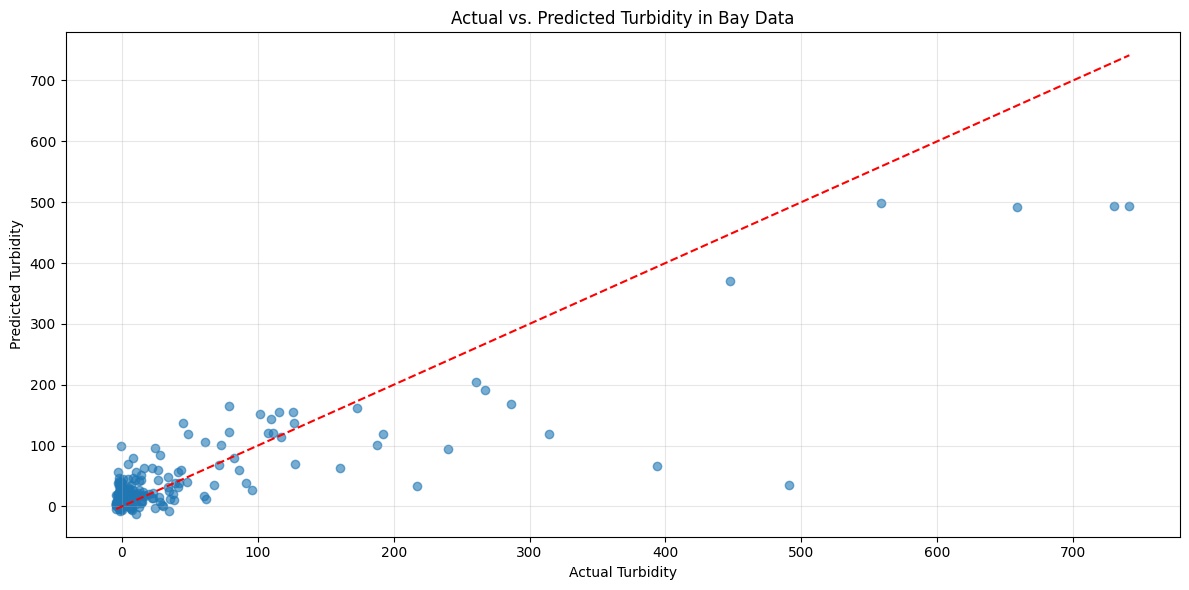

In [41]:
# Plotting actual vs Predicted Turbidity (Bay Data)
plt.figure(figsize=(12, 6))
plt.scatter(test_df["Turbidity"], test_df["Predicted_Turbidity"], alpha=0.6)
plt.plot([test_df["Turbidity"].min(), test_df["Turbidity"].max()],
         [test_df["Turbidity"].min(), test_df["Turbidity"].max()],
         'r--')  # 45-degree line
plt.xlabel("Actual Turbidity")
plt.ylabel("Predicted Turbidity")
plt.title("Actual vs. Predicted Turbidity in Bay Data")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [42]:
best_model = aml.leader
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_7_AutoML_1_20250520_174041


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       3/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           0/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2830.2663526731353
RMSE: 53.20024767492286
MAE: 26.63476132788965
RMSLE: NaN
Mean Residu

In [45]:
# Getting rid of location
bay_train_no_location_X = X_train_bay.drop(columns=['Location'])
bay_train_no_location_y = y_train_bay.drop(columns=['Location'])
bay_test_no_location_X = X_test_bay.drop(columns=['Location'])
bay_test_no_location_y = y_test_bay.drop(columns=['Location'])

In [46]:
# Training an XGBOOST model

xgb_model = xgb.XGBRegressor(n_jobs=1).fit(bay_train_no_location_X, bay_train_no_location_y)
preds = xgb_model.predict(bay_test_no_location_X)
mse = mean_squared_error(bay_test_no_location_y, preds)
print('MSE: ', mse)
print('RSME: ', np.sqrt(mse))

MSE:  3692.936726570917
RSME:  60.76953781765101


In [47]:
# performing a GridSearch on our XGBOOST model
print('Parameter Optimization')
xgb_model = xgb.XGBRegressor(n_jobs=1)
clf = GridSearchCV(
    xgb_model,
    {'max_depth': [2,4,6,8], 'n_estimators': [50, 100]},
    verbose = 1,
    n_jobs=1,
    cv=5
)
clf.fit(bay_train_no_location_X, bay_train_no_location_y)
print(clf.best_score_)
print(clf.best_params_)

Parameter Optimization
Fitting 5 folds for each of 8 candidates, totalling 40 fits
0.38682570251978465
{'max_depth': 2, 'n_estimators': 50}


In [48]:
best_xgb = clf.best_estimator_

In [49]:
tuned_preds = best_xgb.predict(bay_test_no_location_X)
tuned_mse = mean_squared_error(bay_test_no_location_y, tuned_preds)
tuned_rmse = np.sqrt(tuned_mse)

print('Tuned XGBOOST mse: ', tuned_mse)
print('Tuned XGBOOST rmse: ', tuned_rmse)

Tuned XGBOOST mse:  3561.5298226155246
Tuned XGBOOST rmse:  59.67855412638215


In [89]:
# Trying new model (TabPFN)
!pip install tabpfn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 79.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 755.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.2 MB/s eta 0:00:00


In [92]:
# Initialize a regressor
reg = TabPFNRegressor()
reg.fit(X_train_bay, y_train_bay)

# Make Predictions (using the mean)
tab_preds = reg.predict(X_test_bay)

# Score our model
tab_mse = mean_squared_error(y_test_bay, tab_preds)
tab_rmse = np.sqrt(tab_mse)

# Print Results
print('MSE: ', tab_mse)
print('RMSE: ', tab_rmse)

/usr/local/lib/python3.11/dist-packages/tabpfn/base.py:101: UserWarning:


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



tabpfn-v2-regressor.ckpt:   0%|          | 0.00/44.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/37.0 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/tabpfn/regressor.py:460: UserWarning:

Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client



MSE:  4129.600390397781
RMSE:  64.26196690421
